# Importing the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler


import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style("darkgrid")
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Reading Data

In [3]:
path_train="Data/train.csv"
path_test="Data/test.csv"

train=pd.read_csv(path_train)
test=pd.read_csv(path_test)

In [4]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [6]:
path_submission="Data/sample_submission.csv"
pd.read_csv(path_submission).head()


,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [7]:
#We need to save the id 
id= test['id']
id.to_csv("data/test_id.csv", index = False)


# Select the Target (=Exited)
target = [col for col in train.columns if col not in test.columns][0]
target

'Exited'

# Data Pre-Processing


In [8]:
print(f"Train : {train.shape} \nTest : {test.shape}")

Train : (165034, 14) 
Test : (110023, 13)


# Feature Engineering 

## Feature creation:

In [9]:
def new_features(data):

# Credit_category

     # Define thresholds and labels for bins
     thresholds = [0, 580, 670, 740, 800,float('inf')]  # Define thresholds for bins
     labels = ['Poor', 'Fair', 'Good', 'Very good','Excellent']  # Define labels for each bin

     # Apply binning to create the new feature
     data['Credit_category'] = pd.cut(data['CreditScore'], bins=thresholds, labels=labels, right=False)
# Products_Per_Tenure
     data['Products_Per_Tenure'] = data['Tenure'] / data['NumOfProducts'].replace(0, float('inf'))

# ActiveCC
     data['ActiveCC']=data['HasCrCard'] * data['IsActiveMember']
# Total_Products_Used
     data['Total_Products_Used'] = data['NumOfProducts'] + data['HasCrCard']

# # Age_category 

     # Define thresholds and labels for bins
     thresholds = [0, 25, 35, 50,float('inf')]  # Define thresholds for bins
     labels = ['Young adults', 'Middle-aged Adults', 'Aged Adults', 'Is Senior']  # Define labels for each bin

     # Apply binning to create the new feature
     data['Age_category'] = pd.cut(data['Age'], bins=thresholds, labels=labels, right=False)
# Balance

     data['Mid_Balance'] = data['Balance'].apply(lambda x: 1 if (x <= 122314) & (x > 105223) else 0)
     data['High_Balance'] = data['Balance'].apply(lambda x: 1 if (x > 122314) else 0)

     return data

     

In [10]:
train=new_features(train)
test=new_features(test)

In [11]:
# Drop unecessary columns 
unecessary_cols=['id','CustomerId','Surname']

train.drop(columns=unecessary_cols,inplace=True)
test.drop(columns=unecessary_cols,inplace=True)
    
print(f"Number of dropped columns : {len(unecessary_cols)}\nTrain : {train.shape} \nTest : {test.shape}")


Number of dropped columns : 3
Train : (165034, 18) 
Test : (110023, 17)


## Check Missing Value

In [12]:
def check_missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    

In [13]:
check_missing_values(train)

,Total,Percent
CreditScore,0,0.0
Geography,0,0.0
Mid_Balance,0,0.0
Age_category,0,0.0
Total_Products_Used,0,0.0
ActiveCC,0,0.0
Products_Per_Tenure,0,0.0
Credit_category,0,0.0
Exited,0,0.0
EstimatedSalary,0,0.0


- The dataset does not contain any missing values.

## Categorical Data Conversion

In [14]:
# Get all categorical feature list
list(test.select_dtypes(include=['object','category']).columns)

['Geography', 'Gender', 'Credit_category', 'Age_category']

### Technique Used:
Due to the limited number of categorical columns in our dataset,
- Mannual Encoding : Mannual encoding is a best techinque to handel categorical feature with the help of map function, map the labels based on frequency.

In [15]:
def encoding(train, test):
    target = [col for col in train.columns if col not in test.columns][0]
    test[target] = -1 if train[target].dtype != 'object' else 'A' 
    seps = train.shape[0]
    comb = pd.concat([train, test], axis=0)
    categorical_cols = list(test.select_dtypes(include=['object','category']).columns)

    for col in categorical_cols:
        # Frequency (Count) Encoding
        count_encoder = comb[col].value_counts(ascending=True).to_dict()
        i=0 
        for key, value in count_encoder.items():
            count_encoder[key] = i
            i += 1
        comb[f'{col}_Encoded'] = comb[col].map(count_encoder)
        print(f"For column '{col} : '{count_encoder}")
        comb.drop(col,axis=1,inplace=True)
        
    train = comb[:seps]
    test = comb[seps:].drop(target,axis=1)
    return (train, test)

In [16]:
train,test=encoding(train,test)
train



For column 'Geography : '{'Germany': 0, 'Spain': 1, 'France': 2}


For column 'Gender : '{'Female': 0, 'Male': 1}
For column 'Credit_category : '{'Excellent': 0, 'Very good': 1, 'Poor': 2, 'Good': 3, 'Fair': 4}
For column 'Age_category : '{'Young adults': 0, 'Is Senior': 1, 'Middle-aged Adults': 2, 'Aged Adults': 3}


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Products_Per_Tenure,ActiveCC,Total_Products_Used,Mid_Balance,High_Balance,Geography_Encoded,Gender_Encoded,Credit_category_Encoded,Age_category_Encoded
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,1.5,0.0,3.0,0,0,2,1,4,2
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.5,1.0,3.0,0,0,2,1,4,2
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,5.0,0.0,3.0,0,0,2,1,3,3
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,2.0,1.0,2.0,0,1,2,1,4,2
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,2.5,1.0,3.0,0,0,1,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,2.0,1.0,2.0,0,0,1,0,4,2
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,3.0,0.0,1.0,0,0,2,1,1,3
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,5.0,1.0,2.0,0,0,2,1,2,2
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,7.0,0.0,1.0,0,1,1,0,2,2


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   CreditScore              165034 non-null  int64   
 1   Age                      165034 non-null  float64 
 2   Tenure                   165034 non-null  int64   
 3   Balance                  165034 non-null  float64 
 4   NumOfProducts            165034 non-null  int64   
 5   HasCrCard                165034 non-null  float64 
 6   IsActiveMember           165034 non-null  float64 
 7   EstimatedSalary          165034 non-null  float64 
 8   Exited                   165034 non-null  int64   
 9   Products_Per_Tenure      165034 non-null  float64 
 10  ActiveCC                 165034 non-null  float64 
 11  Total_Products_Used      165034 non-null  float64 
 12  Mid_Balance              165034 non-null  int64   
 13  High_Balance             165034 non-null  int64  

## Outlier Handling

In [18]:
# Remove the outliers in the dataset
outlier_data = []
choosen_column=list(test.select_dtypes(include=['float64']).columns)

for i in choosen_column:
    Q1st = train[i].quantile(0.25)
    Q3rd = train[i].quantile(0.75)
    IQR = Q3rd - Q1st

    low_outlier = Q1st - 1.5 * IQR
    high_outlier = Q3rd + 1.5 * IQR

    outlier = train[(train[i] < low_outlier) | (train[i] > high_outlier)]
    outlier_data.append(outlier)

# Loop through outlier_data and drop rows from df_train_WO
for outlier_df in outlier_data:
    indices_to_drop = [index for index in outlier_df.index if index in train.index]
    train = train.drop(indices_to_drop, axis=0, errors='ignore')

# Reset the index of the resulting DataFrame
train.reset_index(drop=True, inplace=True)

## Scaling The Data

**Standard Scaling** : Standardization is the process of scaling the feature, it assumes the feature follow normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [19]:
list(test.select_dtypes(include=['float64','int64']).columns)


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Products_Per_Tenure',
 'ActiveCC',
 'Total_Products_Used',
 'Mid_Balance',
 'High_Balance',
 'Geography_Encoded',
 'Gender_Encoded']

In [20]:
scaler = StandardScaler()  

cols=list(test.select_dtypes(include=['float64','int64']).columns)

train[cols]=scaler.fit_transform(train[cols]) 
test[cols]=scaler.fit_transform(test[cols])



In [21]:
train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Products_Per_Tenure,ActiveCC,Total_Products_Used,Mid_Balance,High_Balance,Geography_Encoded,Gender_Encoded,Credit_category_Encoded,Age_category_Encoded
0,0.146929,-0.554117,-0.726633,-0.869936,0.843648,0.0,-0.968463,1.370927,0,-0.863611,-0.968463,0.843648,-0.35376,-0.542475,0.783032,0.871612,4,2
1,-0.371646,-0.554117,-1.441351,-0.869936,0.843648,0.0,1.032564,-1.265028,0,-1.262366,1.032564,0.843648,-0.35376,-0.542475,0.783032,0.871612,4,2
2,0.273411,0.402563,1.774881,-0.869936,0.843648,0.0,-0.968463,1.439184,0,0.532030,-0.968463,0.843648,-0.35376,-0.542475,0.783032,0.871612,3,3
3,-0.953463,-0.417448,-1.083992,1.503461,-1.044169,0.0,1.032564,-0.564670,0,-0.664234,1.032564,-1.044169,-0.35376,1.843403,0.783032,0.871612,4,2
4,0.754042,-0.554117,-0.011914,-0.869936,0.843648,0.0,1.032564,-1.952945,0,-0.464856,1.032564,0.843648,-0.35376,-0.542475,-0.460093,0.871612,3,2


## Checking Correlation

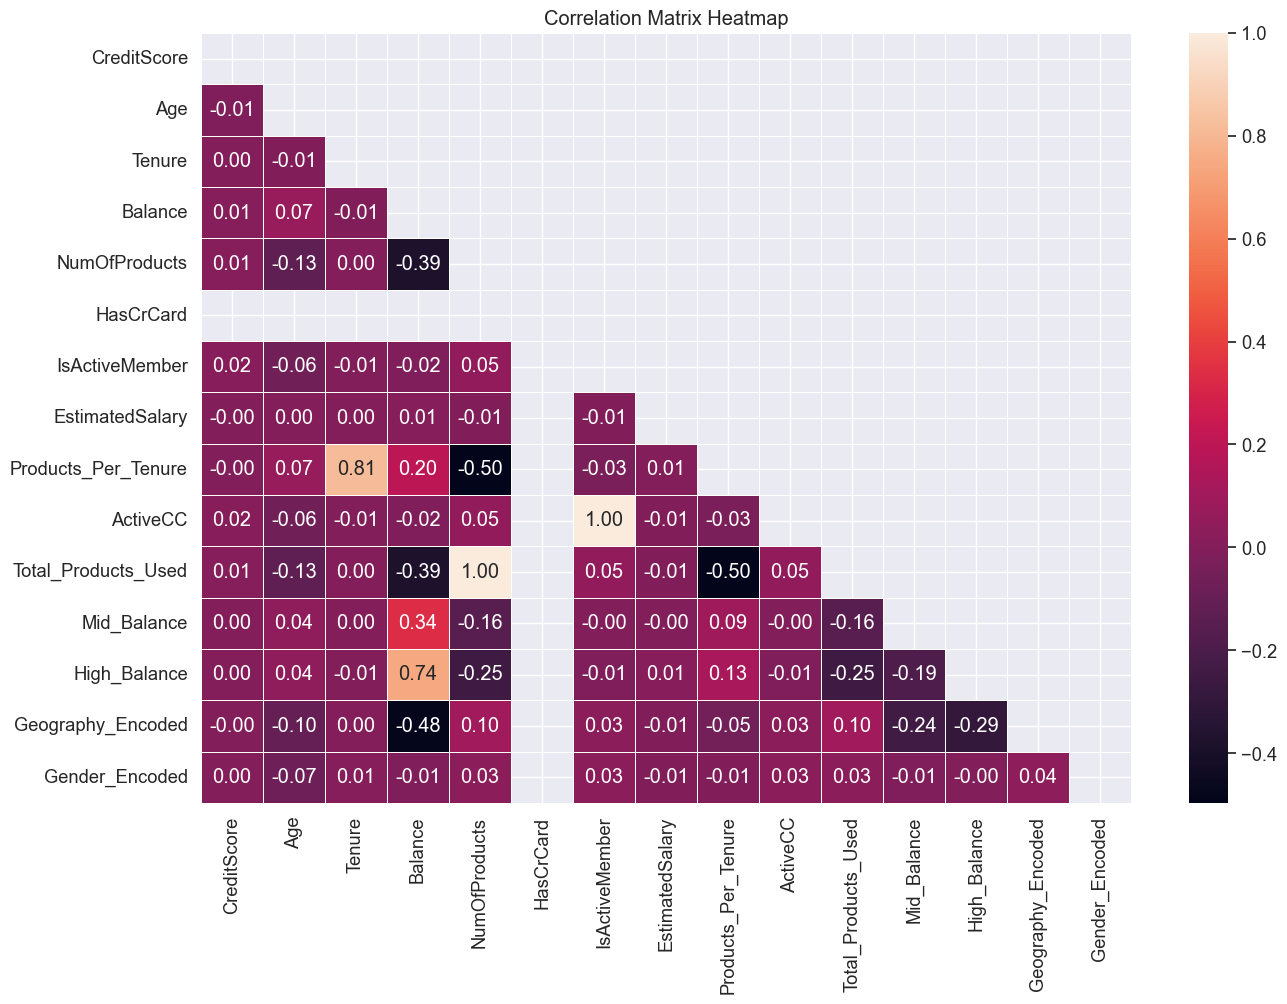

In [22]:
cols=list(test.select_dtypes(include=['float64','int64']).columns)
# Compute the correlation matrix
corr = train[cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

#Graph I.
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.2)

sns.heatmap(corr,mask = mask,annot=True, linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


## Check Duplicates


In [23]:
print("Number of duplicate rows: ", train.duplicated().sum())


# Drop duplicates
if train.duplicated().sum()>0:
    train.drop_duplicates(inplace=True)
    

Number of duplicate rows:  88


In [24]:
# For train : 
train_PreProcess=train
# For test :
test_PreProcess=test

In [25]:
test_PreProcess.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Products_Per_Tenure,ActiveCC,Total_Products_Used,Mid_Balance,High_Balance,Geography_Encoded,Gender_Encoded,Credit_category_Encoded,Age_category_Encoded
0,-0.878176,-1.706504,-1.067887,-0.881274,0.820030,-1.746219,1.009580,0.967874,-1.052504,-0.761515,-0.440063,-0.355474,-0.545592,0.787433,-1.135026,4,0
1,0.329567,0.888990,-1.067887,-0.881274,-1.015806,0.572666,-0.990511,-0.790939,-0.653982,-0.761515,-0.440063,-0.355474,-0.545592,0.787433,-1.135026,3,3
2,-0.006609,-0.465181,0.713922,-0.881274,0.820030,0.572666,-0.990511,0.528413,-0.056199,-0.761515,0.996347,-0.355474,-0.545592,0.787433,-1.135026,4,2
3,0.304665,-0.239486,1.070284,-0.881274,-1.015806,0.572666,-0.990511,0.032150,1.737149,-0.761515,-0.440063,-0.355474,-0.545592,0.787433,0.881037,3,3
4,1.188684,-0.013791,1.783008,1.050038,-1.015806,0.572666,-0.990511,0.539331,2.534193,-0.761515,-0.440063,2.813147,-0.545592,-1.695286,0.881037,1,3


In [26]:
train_PreProcess.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Products_Per_Tenure,ActiveCC,Total_Products_Used,Mid_Balance,High_Balance,Geography_Encoded,Gender_Encoded,Credit_category_Encoded,Age_category_Encoded
0,0.146929,-0.554117,-0.726633,-0.869936,0.843648,0.0,-0.968463,1.370927,0,-0.863611,-0.968463,0.843648,-0.35376,-0.542475,0.783032,0.871612,4,2
1,-0.371646,-0.554117,-1.441351,-0.869936,0.843648,0.0,1.032564,-1.265028,0,-1.262366,1.032564,0.843648,-0.35376,-0.542475,0.783032,0.871612,4,2
2,0.273411,0.402563,1.774881,-0.869936,0.843648,0.0,-0.968463,1.439184,0,0.532030,-0.968463,0.843648,-0.35376,-0.542475,0.783032,0.871612,3,3
3,-0.953463,-0.417448,-1.083992,1.503461,-1.044169,0.0,1.032564,-0.564670,0,-0.664234,1.032564,-1.044169,-0.35376,1.843403,0.783032,0.871612,4,2
4,0.754042,-0.554117,-0.011914,-0.869936,0.843648,0.0,1.032564,-1.952945,0,-0.464856,1.032564,0.843648,-0.35376,-0.542475,-0.460093,0.871612,3,2


# Saving Pre-Process Data
Save all the preprocess data in new file 


In [27]:
train_PreProcess.to_csv("data/train_PreProcess.csv",index=False)
test_PreProcess.to_csv("data/test_PreProcess.csv", index = False)